# Exploratory Data Analysis - Intro to Pandas
the exploratory data analysis EDA

# 1. Importing the Libraries
The most important library you will need in this notebook is - you guessed it - `Pandas`. You will also use the `Seaborn` library for plotting the data. 

In [1]:
# Import the Pandas library
import pandas as pd
# Import the Seaborn library for plotting
#!pip install seaborn
import seaborn as sns

# 2. Importing the Data


In [2]:
# Load the dataset and save it to the df variable
df = pd.read_csv('data/world_happiness_2019.csv')

# 3. Basic Operations With a Dataframe

## 3.1 View the Dataframe
You can use `DataFrame.head()` and `DataFrame.tail()` to view the first or last rows of the frame respectively. You can also display the contents of your dataframe by simply writing `df`.

Note that all of this only works if you use it in the last line of code in the cell, because the cells automatically display the output of the last line. If you want to see more than one dataframe by running a single cell or if you want to perform some other tasks after displaying the dataframe, then you better encapsulate it with `print()` or `display()`. `display()` function will print the dataframe, but with the same format as just calling `df`, whereas `print()` will print as plain text. 


In [3]:
# This line will display the first few rows of the dataframe if there are no lines of code after.
df.head()

# Try uncommenting different combinations of the lines below.
# print(df.head())
# print(df)
# display(df)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [4]:
# This line will display only the last two rows of the dataframe.
df.tail(2)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [5]:
v = df.values
print('v type:', type(v))
print('v shape:', v.shape)
print('v ndim:', v.ndim)
print(v)

v type: <class 'numpy.ndarray'>
v shape: (156, 9)
v ndim: 2
[[1 'Finland' 7.769 ... 0.596 0.153 0.393]
 [2 'Denmark' 7.6 ... 0.592 0.252 0.41]
 [3 'Norway' 7.554 ... 0.603 0.271 0.341]
 ...
 [154 'Afghanistan' 3.203 ... 0.0 0.158 0.025]
 [155 'Central African Republic' 3.083 ... 0.225 0.235 0.035]
 [156 'South Sudan' 2.853 ... 0.01 0.202 0.091]]


## 3.2 Index and Column Names
In the `DataFrame`, the data is stored in a two dimensional grid (rows and columns). The rows are indexed and the columns are named. To see the index or the column names, you can use `DataFrame.index` or `DataFrame.columns` respectively.

In [6]:
df.index

RangeIndex(start=0, stop=156, step=1)

As you can see, the index is a range of numbers between 0 (inclusive) and 2199 (not inclusive).

Run the cell below to see the column names.

In [7]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

rename

In the next example, you will see how you can automatically replace all spaces with underscores

In [8]:
# A dictionary mapping old column names to new column names. In addition to replacing spaces
# with underscores, you will make all of the text lowercase.
columns_to_rename = {i: "_".join(i.split(" ")).lower() for i in df.columns}
# Note that this dictionary is created automatically from the column names.

# Rename the columns
df = df.rename(columns=columns_to_rename)
# Display the new dataframe
df.head()

,overall_rank,country_or_region,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## 3.3 Data Types
One cool thing about the DataFrame type is that the columns of the resulting DataFrame can have different `dtypes`. This is something you simply can not do with a Numpy array. You can look at them and if needed to you can change them.

In [9]:
df.dtypes

overall_rank                      int64
country_or_region                object
score                           float64
gdp_per_capita                  float64
social_support                  float64
healthy_life_expectancy         float64
freedom_to_make_life_choices    float64
generosity                      float64
perceptions_of_corruption       float64
dtype: object

You can see that the columns above are of different types and if you compare it to how the data actually looks like, it seems that the types are correct. Sometimes if your data is incorrectly formatted, the imported types will be wrong. In this case you will want to change the types of the columns manually before proceeding. Check the code below on how you can do that. Note that nothing will change after running the code below, as the data is already of correct types.

In [10]:
# List all of the columns that should be floats
float_columns = [i for i in df.columns if i not in [
    "country_or_region", "overall_rank"]]
# Change the type of all float columns to float
df = df.astype({i: float for i in float_columns})
# Show the types of all columns
df.dtypes

overall_rank                      int64
country_or_region                object
score                           float64
gdp_per_capita                  float64
social_support                  float64
healthy_life_expectancy         float64
freedom_to_make_life_choices    float64
generosity                      float64
perceptions_of_corruption       float64
dtype: object

The `df.info()` provides some additional information. In addition to data types it also tells you the number of non-null values per column.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   overall_rank                  156 non-null    int64  
 1   country_or_region             156 non-null    object 
 2   score                         156 non-null    float64
 3   gdp_per_capita                156 non-null    float64
 4   social_support                156 non-null    float64
 5   healthy_life_expectancy       156 non-null    float64
 6   freedom_to_make_life_choices  156 non-null    float64
 7   generosity                    156 non-null    float64
 8   perceptions_of_corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


## 3.4 Selecting Columns
One way of selecting a single column is to use `DataFrame.column_name`. Here you can see why it was a good idea that you renamed the columns to not include any whitespaces. This returns a Pandas `Series`, which is a different datatype from a `DataFrame`. You will see how to return a `DataFrame` a bit later.

In [12]:
# Select the score column and store it in x
x = df.score

print(f"type(x):\n {type(x)}\n")
print(f"x:\n{x}")

type(x):
 <class 'pandas.core.series.Series'>

x:
0      7.769
1      7.600
2      7.554
3      7.494
4      7.488
       ...  
151    3.334
152    3.231
153    3.203
154    3.083
155    2.853
Name: score, Length: 156, dtype: float64


Another way to do this is to use square brackets and the name of the column in quortes, much as you would do when accessing an entry in a dictionary. As with dictionaries, you can use double quotes or simple quotes. 

In [13]:
x = df["score"]

print(f"type(x):\n {type(x)}\n")
print(f"x:\n{x}")

type(x):
 <class 'pandas.core.series.Series'>

x:
0      7.769
1      7.600
2      7.554
3      7.494
4      7.488
       ...  
151    3.334
152    3.231
153    3.203
154    3.083
155    2.853
Name: score, Length: 156, dtype: float64


Passing a list of labels rather than a single label selects the columns and returns a DataFrame (rather than a Series), with only the selected columns. You can use it to select one or more columns.

In [14]:
# x = df[["score"]]
x = df[["gdp_per_capita", "score"]]

print(f"type(x):\n {type(x)}\n")
print(f"x:\n{x}")
x.head()

type(x):
 <class 'pandas.core.frame.DataFrame'>

x:
     gdp_per_capita  score
0             1.340  7.769
1             1.383  7.600
2             1.488  7.554
3             1.380  7.494
4             1.396  7.488
..              ...    ...
151           0.359  3.334
152           0.476  3.231
153           0.350  3.203
154           0.026  3.083
155           0.306  2.853

[156 rows x 2 columns]


,gdp_per_capita,score
0,1.340,7.769
1,1.383,7.600
2,1.488,7.554
3,1.380,7.494
4,1.396,7.488


In [15]:
df.score.nunique()

155

## 3.5 Selecting Rows
Passing a slice `:` selects matching rows and returns a DataFrame with all columns in your original dataframe.

In [16]:
y = df[2:5]
print(f"type(y):\n {type(y)}\n")
y.head()

type(y):
 <class 'pandas.core.frame.DataFrame'>



,overall_rank,country_or_region,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## 3.6 Iterating Over Rows
If you want to iterate over the rows, you can use the `.iterrows()` method. For each row it yields a (index, row) tuple, where the row is a `Series` object containing the data. Note that this does not preserve the data types (dtypes) across the rows (dtypes are preserved across columns for DataFrames).

In [17]:
index, row = next(df.iterrows())
print(f"type(index): {type(index)}")
print(f"index: {index}\n")
print(f"type(row): {type(row)}")
print(f"row:\n{row}\n")

type(index): <class 'int'>
index: 0

type(row): <class 'pandas.core.series.Series'>
row:
overall_rank                          1
country_or_region               Finland
score                             7.769
gdp_per_capita                     1.34
social_support                    1.587
healthy_life_expectancy           0.986
freedom_to_make_life_choices      0.596
generosity                        0.153
perceptions_of_corruption         0.393
Name: 0, dtype: object



## 3.7 Boolean Indexing

Run the cell below to select rows where the year equals to 2022. Try to uncomment some other row to see what it does.

In [18]:
print(df["score"] > 7.5)

df[df["score"] > 7.5]
# df[df["life_ladder"] > 5] # Select rows where life_ladder > 5
# df[df["life_ladder"] > 11] # This one should return an empty dataframe

0       True
1       True
2       True
3      False
4      False
       ...  
151    False
152    False
153    False
154    False
155    False
Name: score, Length: 156, dtype: bool


,overall_rank,country_or_region,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


Note that now that you selected only the certain rows, the index column does not make much sense anymore because you have a lot of gaps. While this is not a problem, in some cases you might want the index to correspond to the actual row number. To achieve this you can use `reset_inex()`. In other cases you might want to keep the index as it is to more easily refer back to the original dataframe. It all depends on the context of your project. Run the cell below to reset the index and take a look at the output.

In [19]:
new_df = df[(df["score"] < 7.0) & (df["score"] > 6.5)]
new_df = new_df.reset_index(drop=True)
new_df

,overall_rank,country_or_region,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,17,Germany,6.985,1.373,1.454,0.987,0.495,0.261,0.265
1,18,Belgium,6.923,1.356,1.504,0.986,0.473,0.160,0.210
2,19,United States,6.892,1.433,1.457,0.874,0.454,0.280,0.128
3,20,Czech Republic,6.852,1.269,1.487,0.920,0.457,0.046,0.036
4,21,United Arab Emirates,6.825,1.503,1.310,0.825,0.598,0.262,0.182
5,22,Malta,6.726,1.300,1.520,0.999,0.564,0.375,0.151
6,23,Mexico,6.595,1.070,1.323,0.861,0.433,0.074,0.073
7,24,France,6.592,1.324,1.472,1.045,0.436,0.111,0.183


# 4. Summary Statistics


In [20]:
df.describe()

,overall_rank,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


# 5. Plotting
If you want to plot the data, you can use `DataFrame.plot()`. By default it uses the index as the x axis and plots all the numeric columns as y axes. Run the cell below to see the output for your dataframe.

<Axes: >

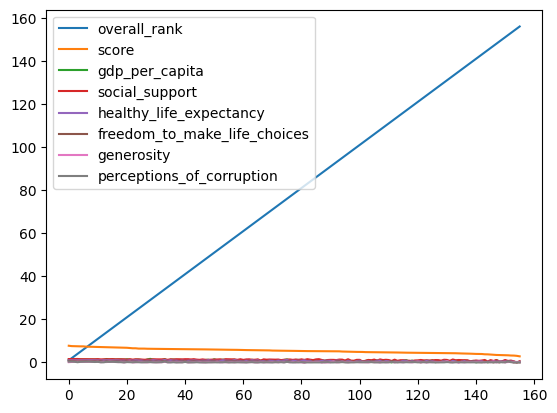

In [21]:
# If the plot doesn’t render, first try re-running this cell. If that doesn’t work,
# you can restart the kernel (from the Kernel menu above) and try running the notebook again
# df.drop(columns=["overall_rank"], inplace=True)  # Drop non-numeric column
df.plot()

As you can see, in this case the plot is not very useful. The index does not have any specific meaning, and the values of various columns differ greatly (years are all around 2000, but the values in the other columns are much lower) and thus you cannot see much in the plot. Try setting some parameters of the `.plot()` method to see what it allows you to do. You can find the documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html).

Run the cell below to see a scatter plot with specifically chosen x and y variables. On the x axis there is logarithm of the GDP (measuring the wealth) while on the y axis there is the life ladder. This column contains values which are an estimate of self-assessed life quality on a scale of 1 to 10 as given by a survey among the people.

<Axes: xlabel='gdp_per_capita', ylabel='overall_rank'>

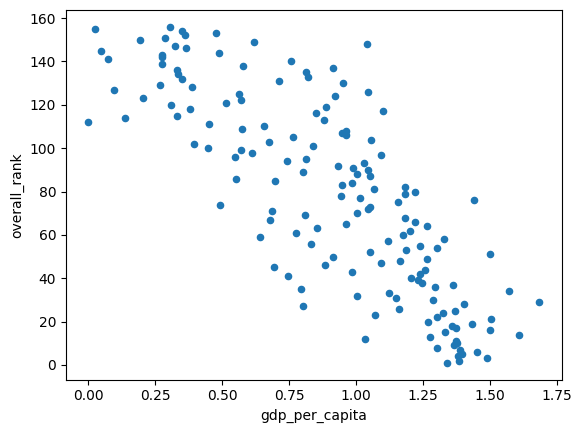

In [22]:
df.plot(kind='scatter', x='gdp_per_capita', y='overall_rank')

Sometimes it is very insightful to separate the points by colors to highlight different characteristics or some points you are most interested in. Take a look at the example below

<Axes: xlabel='gdp_per_capita', ylabel='overall_rank'>

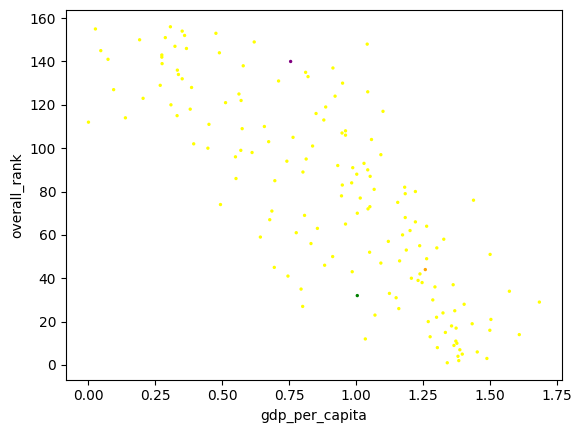

In [23]:
# Create a dictionary to map the country names to colors
cmap = {
    'Brazil': 'Green',
    'Slovenia': 'Orange',
    'India': 'purple'
}

df.plot(
    kind='scatter',
    x='gdp_per_capita',
    y='overall_rank',
    c=[cmap.get(c, 'yellow') for c in df.country_or_region],  # Set the colors
    s=2  # Set the size of the points
)

Another very useful task you can do with plots is to visulize the distribution of your data. You will learn how to do this in more detail later, but for example you can easily plot a histogram using Pandas. Ise `DataFrame.hist()` on the dataframe you want to plot. Note that if you have many columns in the dataframe, this command will plot a histogram for each of the columns. You can select a single column from the dataframe if you only want to plot that one.

array([[<Axes: title={'center': 'gdp_per_capita'}>]], dtype=object)

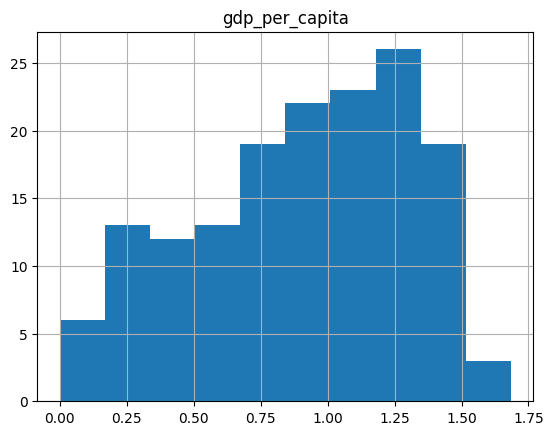

In [24]:
df.hist("gdp_per_capita")

You can use other external libraries to easily produce various advanced plots. One of such libraries is [Seaborn](https://seaborn.pydata.org/). You have already imported it at the beginning of this lab using `import seaborn as sns`. Run the cell below to see one of the many simple and efficient plotting possibilities (you will use this one later on in the other notebooks as well). Since the dataset has many columns it might take a few seconds to run.

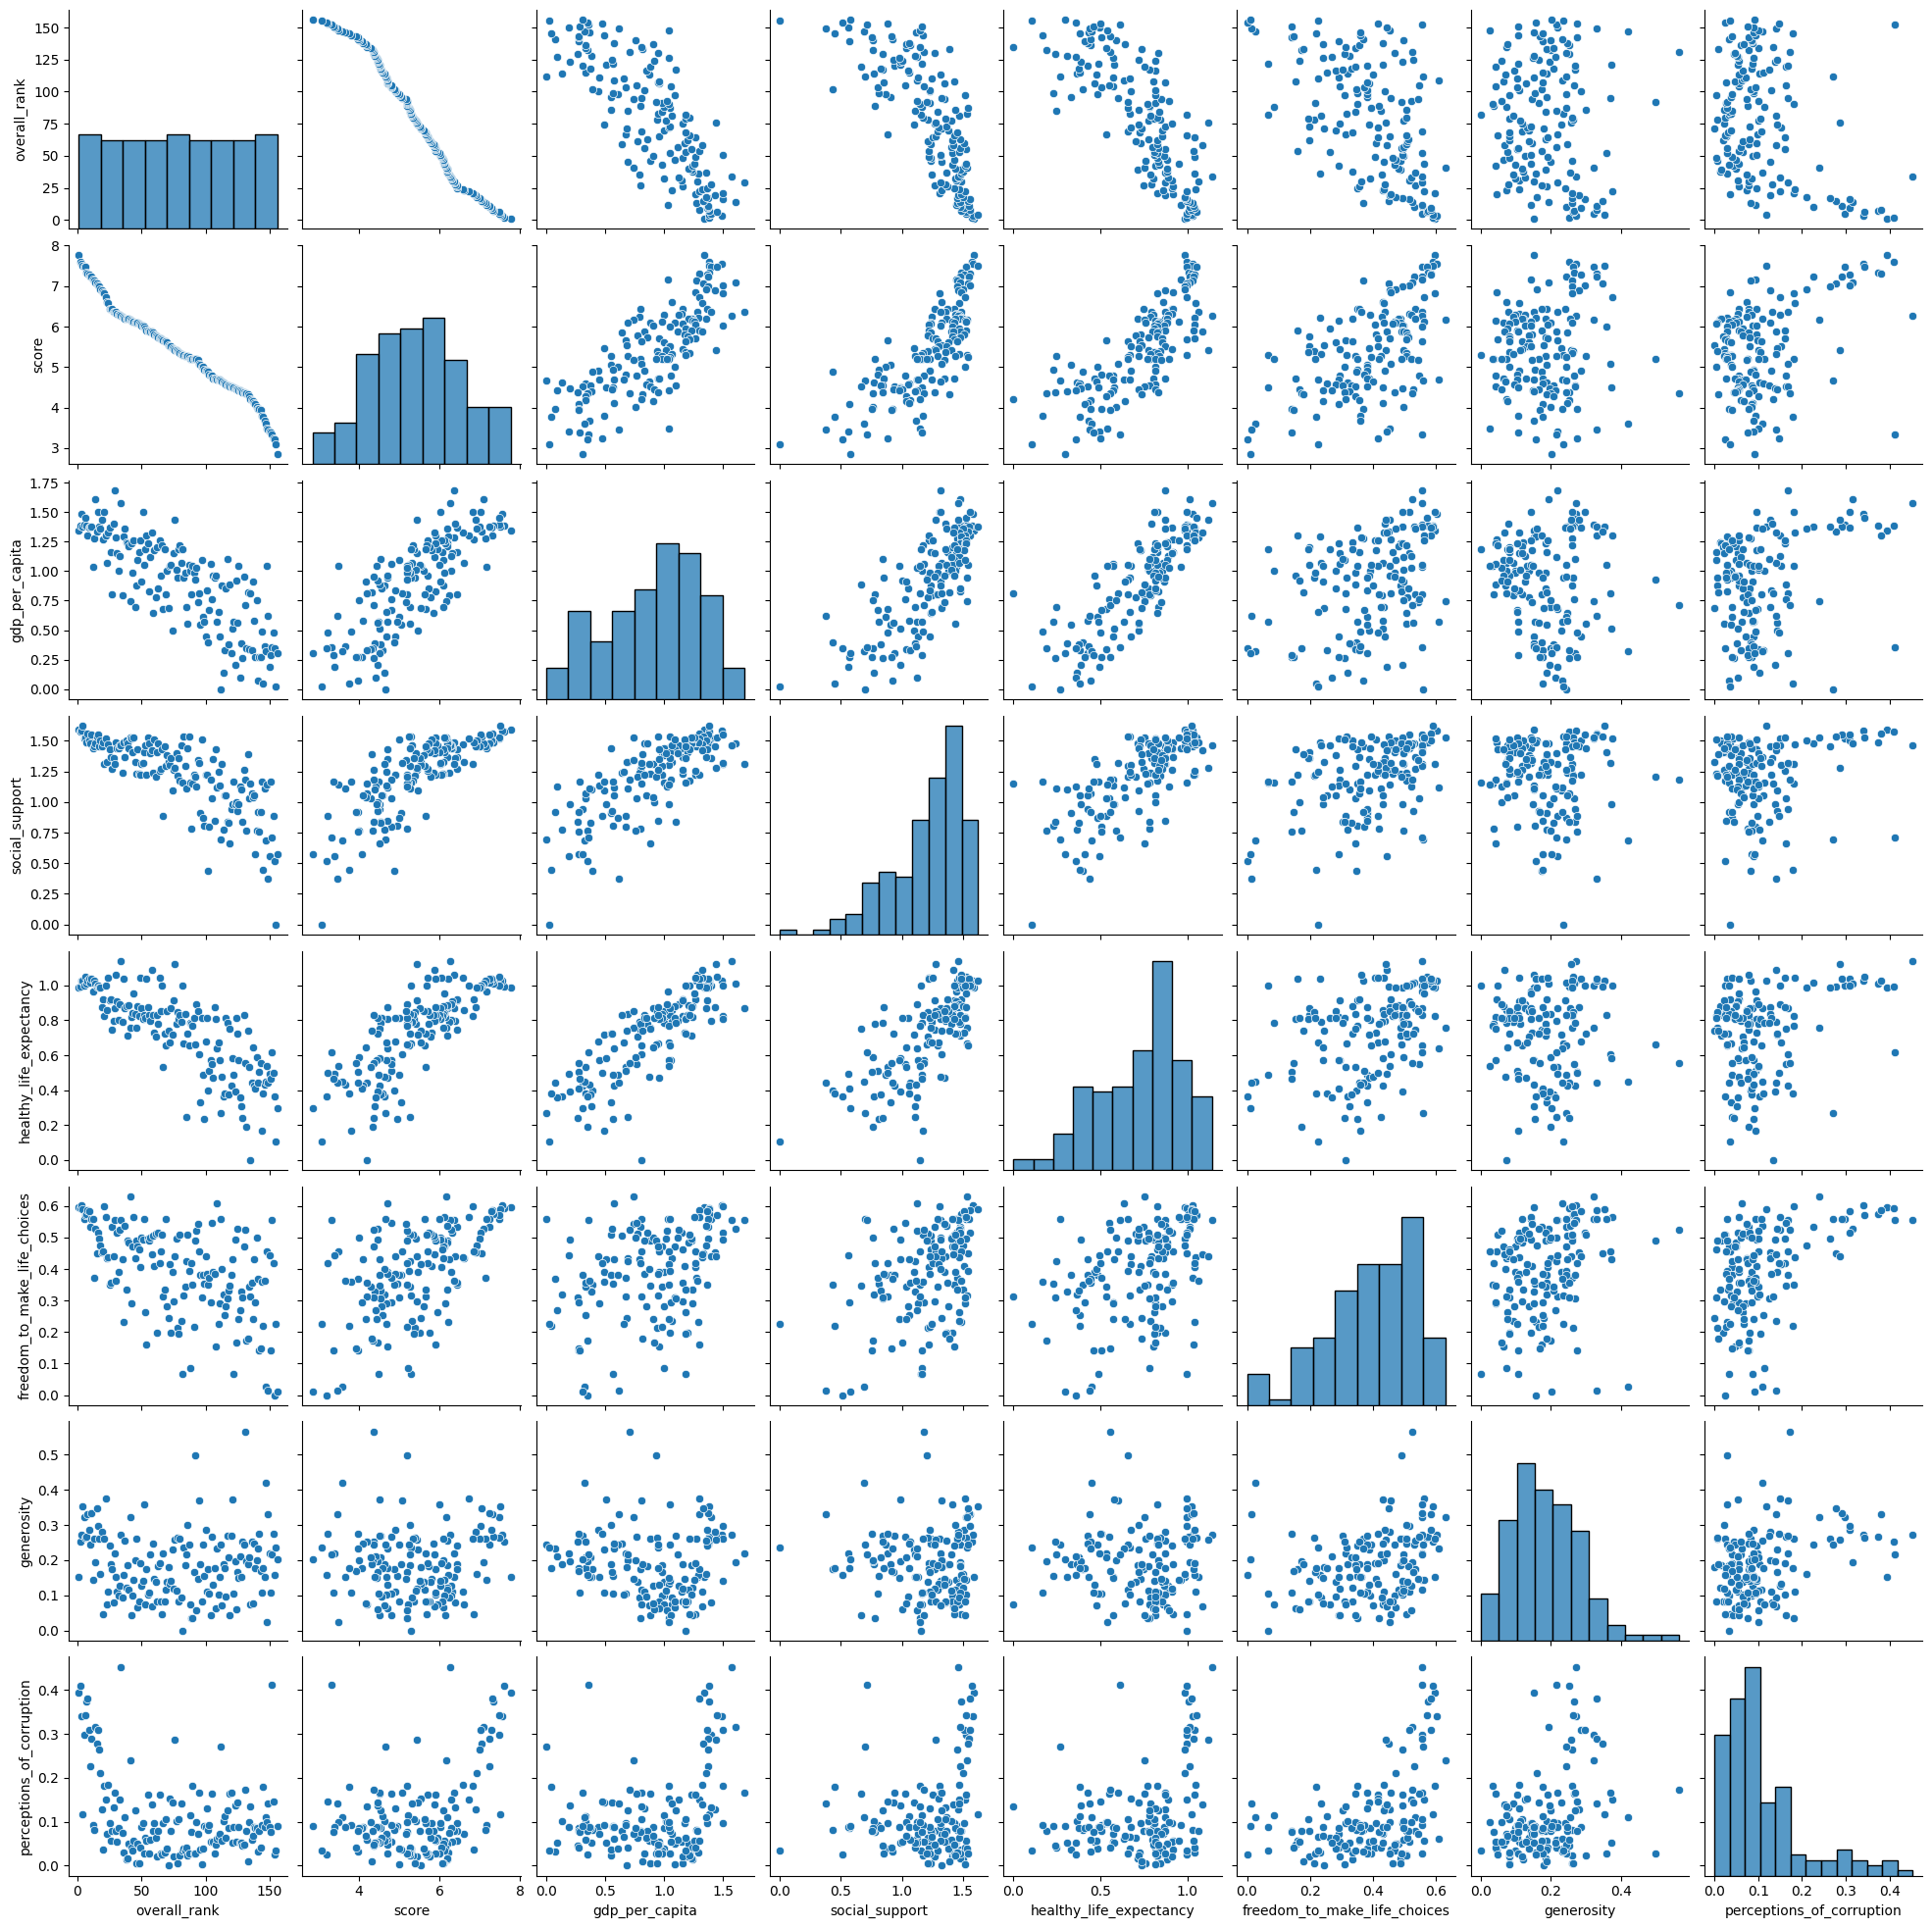

In [25]:
# If the plot doesn’t render, first try re-running this cell. If that doesn’t work,
# you can restart the kernel (from the Kernel menu above) and try running the notebook again
sns.pairplot(df)

# 6. Operations on Columns

In [26]:
df.head()

,overall_rank,country_or_region,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [27]:
# Create a new column which is the sum of the year and the value on the life ladder.
df["xx"] = df["score"] + df["gdp_per_capita"]
df.head()

,overall_rank,country_or_region,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,xx
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,9.109
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,8.983
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,9.042
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,8.874
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,8.884


If you want to perform some more advanced operations on columns, you can use `DataFrame.apply()`, with which you can apply practically any function to a column. Below you can see how to use the `DataFrame.apply()` in various ways. Try to edit `my_function` to perform an operation of your choice.

In [28]:
# Using df.apply() with a lambda function
# Rescale the life_ladder column to values between 0 and 1 and save it to a new column
df['new1'] = df['score'].apply(lambda x: x * 10)

# Using df.apply() with your own function
# First define a function. The function can do whatever you want. This example will double the column's values


def my_function(x):
    # do stuff to x
    y = x * 2
    return y


# Apply the function.
df['my_function'] = df['new1'].apply(my_function)

# Show the new dataframe
df.head()

,overall_rank,country_or_region,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,xx,new1,my_function
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,9.109,77.69,155.38
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,8.983,76.00,152.00
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,9.042,75.54,151.08
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,8.874,74.94,149.88
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,8.884,74.88,149.76
